Importing necessary libraries:

In [14]:
import numpy as np
import pandas as pd
import sys
import sklearn
import visuals as vs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset:

In [15]:
data = pd.read_csv('housing.csv')

In [16]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
prices = data['medv']
features = data.drop('medv', axis=1)
print("Boston housing dataset has {} data points with {} variables each" .format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each


## Data Exploration:

The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

In [18]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Stats for the boston housing data:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price: ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Stats for the boston housing data:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price: $21.2
Standard deviation of prices: $9.188011545278206


### Question 1 - Feature Observation

We are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

**High values of 'RM' and lower values of 'LSTAT' and 'PTRATIO' indicates high price of houses in that neighborhood. Lower values of 'RM' and high values of 'LSTAT' and 'PTRATIO' indicates lower prices of houses in the region.**

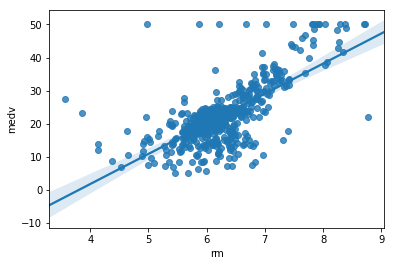

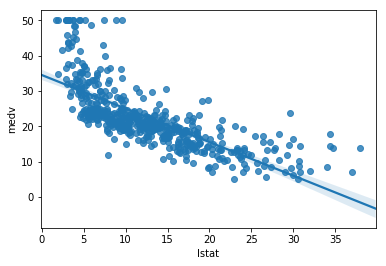

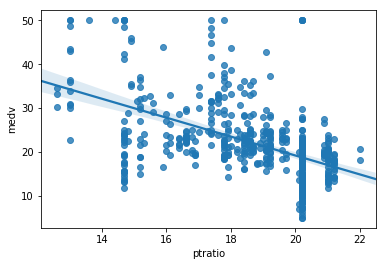

In [19]:
for var in ['rm', 'lstat', 'ptratio']:
    sns.regplot(data[var], prices)
    plt.show()

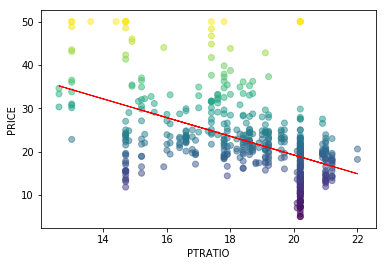

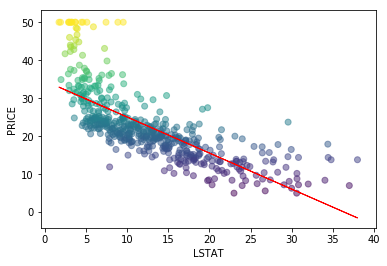

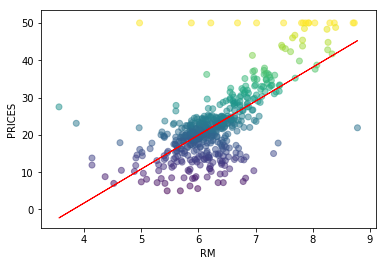

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

"""PTRATIO"""
pt_ratio = data['ptratio'].values.reshape(-1,1)
reg.fit(pt_ratio, prices)
plt.plot(pt_ratio, reg.predict(pt_ratio), color="red", linewidth=1)
plt.scatter(pt_ratio, prices, alpha=0.5, c=prices)
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.show()

"""LSTAT"""
lstat = data['lstat'].values.reshape(-1,1)
reg.fit(lstat, prices)
plt.plot(lstat, reg.predict(lstat), color='red', linewidth=1)
plt.scatter(lstat, prices, alpha=0.5, c=prices)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

"""RM"""
rm = data['rm'].values.reshape(-1, 1)
reg.fit(rm, prices)
plt.plot(rm, reg.predict(rm), color='red', linewidth=1)
plt.scatter(rm, prices, alpha=0.5, c=prices)
plt.xlabel('RM')
plt.ylabel('PRICES')
plt.show()

## Developing a Model:

### Implementation: Define a Performance Metric

In [21]:
from sklearn.metrics import r2_score

In [22]:
def performance_metric(y_true, y_predict):    
    score = r2_score(y_true, y_predict)
    return score

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

## Analyzing Model Performances:

### Learning Curves:

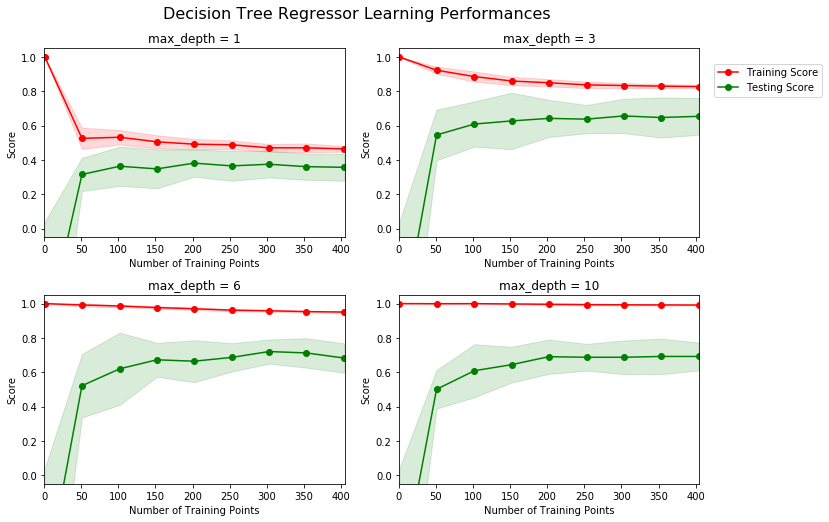

In [24]:
vs.ModelLearning(features, prices)

The convergence, specially from 300 to 350 points of the curves presented in max_depth=3 shows that is not needed more samples to decrease the error. Adding more points is not necessary due the convergence of training and testing curves. The max_depth=1 indicates underfitting because the R2 score is too low and can not explain verify well the model. The max_depth=6 indicates an approach that will require more data to check if there is a convergence of the curves. It is a little bit overfitted. Finally, the max_depth=10 is totally overfitted, sice the R2 score is near a constant on 100%. There is no indications of convergence of the curves. The model parameters must be reviewed.

### Complexity Curves:

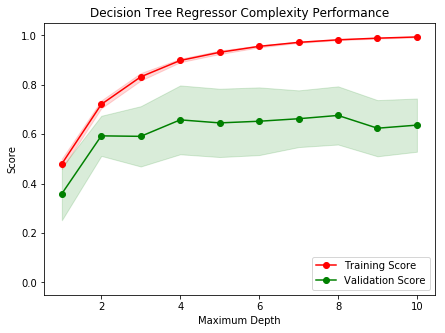

In [25]:
vs.ModelComplexity(X_train, y_train)

Produced a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

### Question 5 - Bias-Variance Tradeoff

With maximum depth of 1 the model suffer from high bias (underfitting) and less standard deviation, compared to other depths, its R2 score is too low (~0.3). The maximum depth of 10 indicates a better R2 score (~0.5) but with high variance, more standard deviation (overfitting), despite the training model has an excelent R2 score (1) is not able to deal with unknown data or testing data (R2 score ~5). The right spot is the maximum depth from 2 to 3 due to high R2 score from both training and testing and less variance.

### Question 6 - Best-Guess Optimal Model

 According to the graph, the maximum depth that the best generalizes new data is related to highest **r2 score**, which is **3**.

## Evaluating Model Performance

In [47]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def fit_model(X, y):
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=42)
    regressor = DecisionTreeRegressor()
    params = {"max_depth": range(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

### Question 7 - Optimal Model

In [59]:
reg = fit_model(X_train, y_train)
print("The parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

The parameter 'max_depth' is 8 for the optimal model.


### Question 8 - Predicting Selling Prices

In [62]:
#Matrix for client data
client_data = [[0.0070, 60, 6.31, 0, 0.1898, 9.975, 45.2, 2.02, 10, 444, 15.3, 406.9, 17.95], # Client 1
               [0.0729, 20, 2.31, 0, 0.898, 2.975, 65.2, 2.02, 3, 256, 19.3, 306.9, 70.95], # Client 2
               [0.0062, 28, 1.31, 0, 0.598, 5.575, 25.2, 4.02, 1, 206, 10.3, 356.9, 18.98]]  # Client 3

for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $39.80
Predicted selling price for Client 2's home: $23.70
Predicted selling price for Client 3's home: $21.70


#### Follow the charts to better understanding of relation of each feature.